In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import pickle
nltk.download('stopwords')
from nltk.corpus import stopwords as stopwords_scratch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\loq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# panggil stopword id
list_stopwords = stopwords_scratch.words('indonesian')
# panggil stopword en
list_stopwords_en = stopwords_scratch.words('english')
# gabungkan id & en
list_stopwords.extend(list_stopwords_en)
# tambah daftar stopword jika perlu
list_stopwords.extend(['ya', 'yg', 'ga', 'yuk', 'dah', 'ngga', 'engga', 'ygy', 'baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'])
stopwords = list_stopwords

In [3]:
stopwords[:10]

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir']

In [4]:
data = pd.read_csv('./data/dataPrabowo_cleaned.csv')
data.head()

,id_str,full_text,hurufKecil_fullText,cleaning,tokenizing,stopword,stemming,cleaning_stemmed
0,1757937871485546900,Yang menang secara formal memang Prabowo-Gibra...,yang menang secara formal memang prabowo-gibra...,yang menang secara formal memang prabowogibran...,"['yang', 'menang', 'secara', 'formal', 'memang...","['menang', 'formal', 'memang', 'prabowogibran'...","['menang', 'formal', 'memang', 'prabowogibran'...",menang formal memang prabowogibran menang simb...
1,1829682463418814636,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,jejak digital gibran menghina prabowo di kasku...,"['jejak', 'digital', 'gibran', 'menghina', 'pr...","['jejak', 'digital', 'gibran', 'menghina', 'pr...","['jejak', 'digital', 'gibran', 'hina', 'prabow...",jejak digital gibran hina prabowo kaskus bongk...
2,1795826031460569132,Ponakannya Pak Prabowo sama Anaknya Pak Jokowi...,ponakannya pak prabowo sama anaknya pak jokowi...,ponakannya pak prabowo sama anaknya pak jokowi,"['ponakannya', 'pak', 'prabowo', 'sama', 'anak...","['ponakannya', 'pak', 'prabowo', 'sama', 'anak...","['ponakan', 'pak', 'prabowo', 'sama', 'anak', ...",ponakan pak prabowo sama anak pak jokowi
3,1757642400716222595,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di @kawalpemilu_org anies: ...,prediksi sementara di org anies prabowo ganjar,"['prediksi', 'sementara', 'di', 'org', 'anies'...","['prediksi', 'org', 'anies', 'prabowo', 'ganjar']","['prediksi', 'org', 'anies', 'prabowo', 'ganjar']",prediksi org anies prabowo ganjar
4,1826787824278143082,LAGI RAME DI MEDSOS. BOIKOT ARTIS2 YG JD INFLU...,lagi rame di medsos. boikot artis2 yg jd influ...,lagi rame di medsos boikot artis yg jd influen...,"['lagi', 'rame', 'di', 'medsos', 'boikot', 'ar...","['rame', 'medsos', 'boikot', 'artis', 'yg', 'j...","['rame', 'medsos', 'boikot', 'artis', 'yg', 'j...",rame medsos boikot artis yg jd influencer joko...


In [5]:
data = data.cleaning.to_list()

In [6]:
vectorizer = TfidfVectorizer(stop_words=stopwords)
X = vectorizer.fit_transform(data)

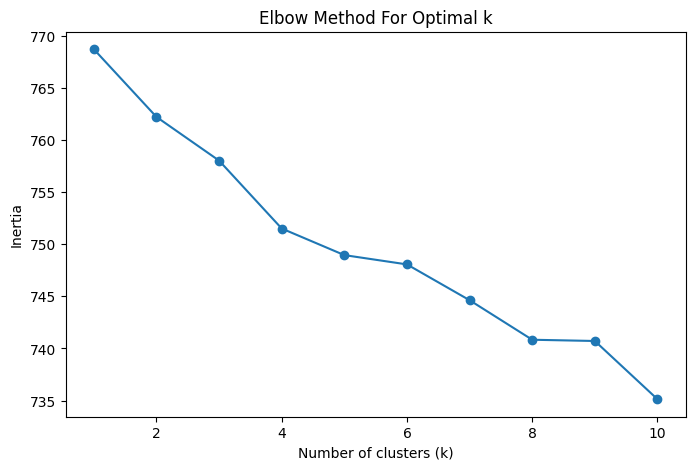

In [13]:
# List to hold the inertia values for each k
inertia_values = []

# Loop over a range of cluster numbers from 1 to 30
for k in range(1, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    model.fit(X)
    
    # Append the inertia (sum of squared distances to the nearest cluster center)
    inertia_values.append(model.inertia_)

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
true_k = 9
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=true_k)
model.fit(X)

KMeans(max_iter=1000, n_clusters=9, n_init=9)

In [28]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# get_feature_names is deprecated in scikit-learn versions >= 0.2
# and replaced by get_feature_names_out
terms = vectorizer.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  for ind in order_centroids[i, :10]:
    print(' %s' % terms[ind])
  print()

Cluster 0:
 keluarga
 prabowo
 serius
 subianto
 jenderal
 fufufafa
 memilih
 gue
 jokowi
 marah

Cluster 1:
 indonesia
 tni
 kasih
 rakyat
 presiden
 terima
 prabowo
 nasional
 semoga
 polri

Cluster 2:
 pendukung
 gibran
 prabowo
 adu
 domba
 dgn
 isu
 jokowi
 wapres
 bener

Cluster 3:
 fufufafa
 akun
 amp
 prabowo
 bangsa
 gibran
 orang
 udah
 sentil
 caci

Cluster 4:
 dpd
 ri
 sinergi
 pertahanan
 kunjungan
 pimpinan
 menhan
 membangun
 terima
 negara

Cluster 5:
 kabinet
 menteri
 prabowo
 masuk
 prabowogibran
 kabar
 agama
 partai
 bocoran
 jokowi

Cluster 6:
 presiden
 terpilih
 subianto
 wakil
 prabowo
 gibran
 rakabuming
 raka
 pelantikan
 jokowi

Cluster 7:
 makan
 gratis
 siang
 program
 bergizi
 jam
 prabowo
 malam
 diusung
 prabowogibran

Cluster 8:
 prabowo
 jokowi
 solo
 anies
 gibran
 pelantikan
 prabowogibran
 pertemuan
 psi
 menang



In [29]:
from sklearn.metrics import silhouette_score

silhouette_score(X, labels=model.predict(X))

np.float64(0.011063786438576443)

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)

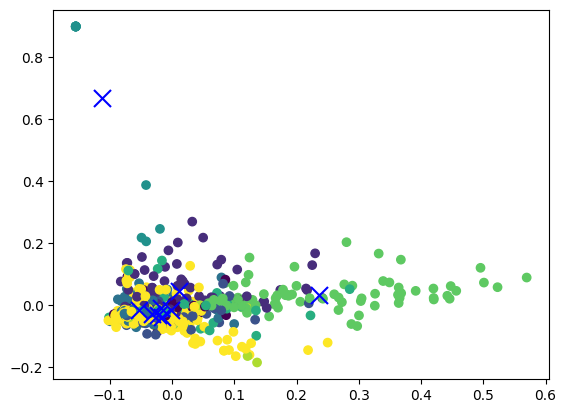

In [31]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')